Premer grafa: 5
Iteracija: 0


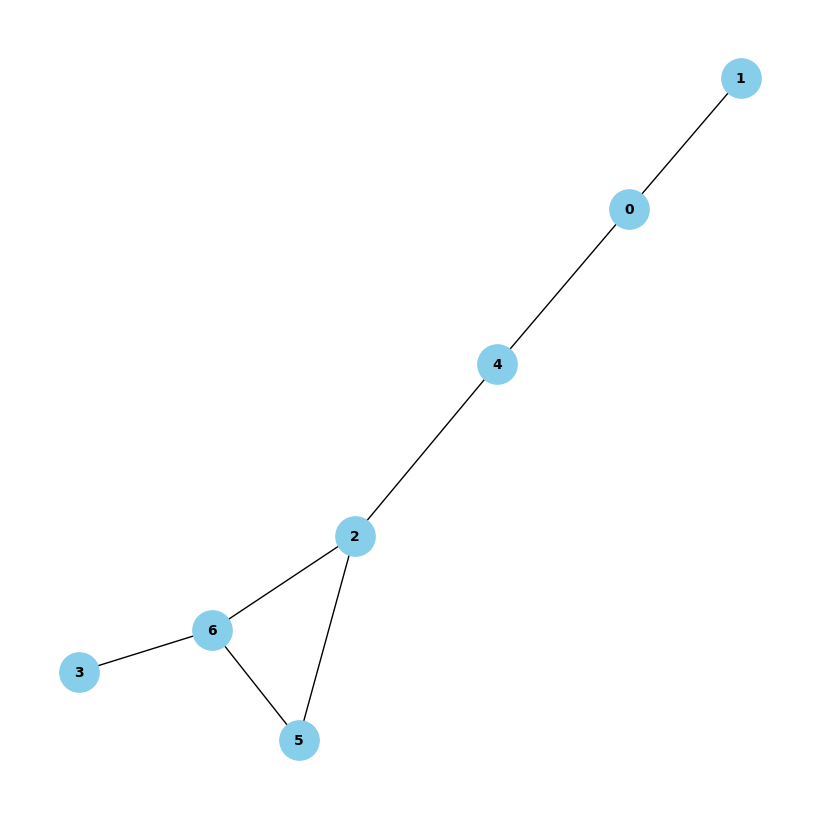

Premer grafa: 4
Iteracija: 2


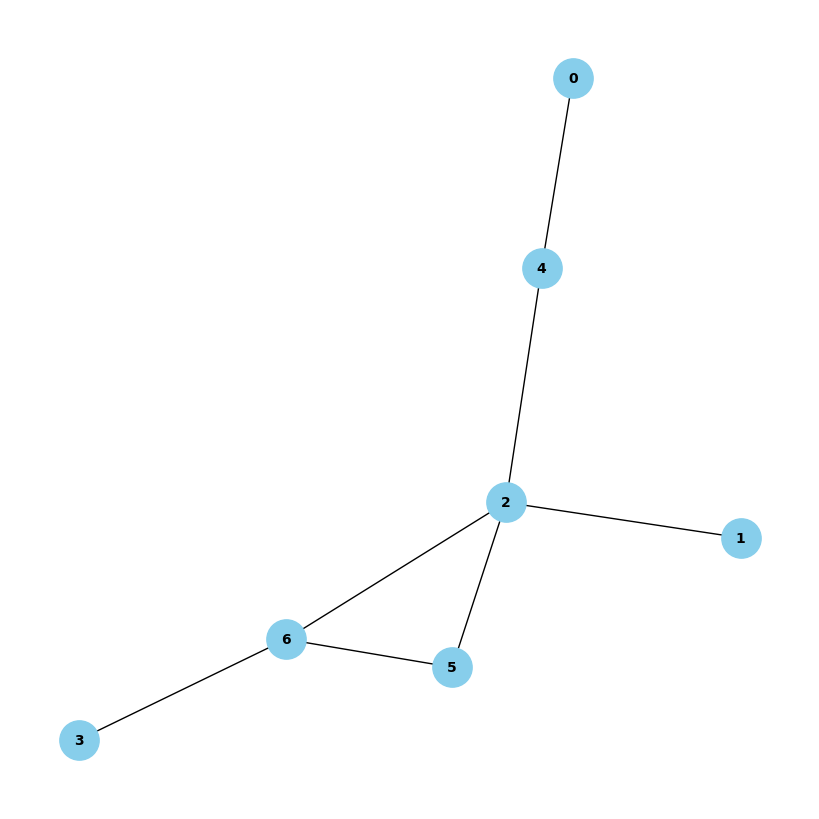

Premer grafa: 3
Iteracija: 6


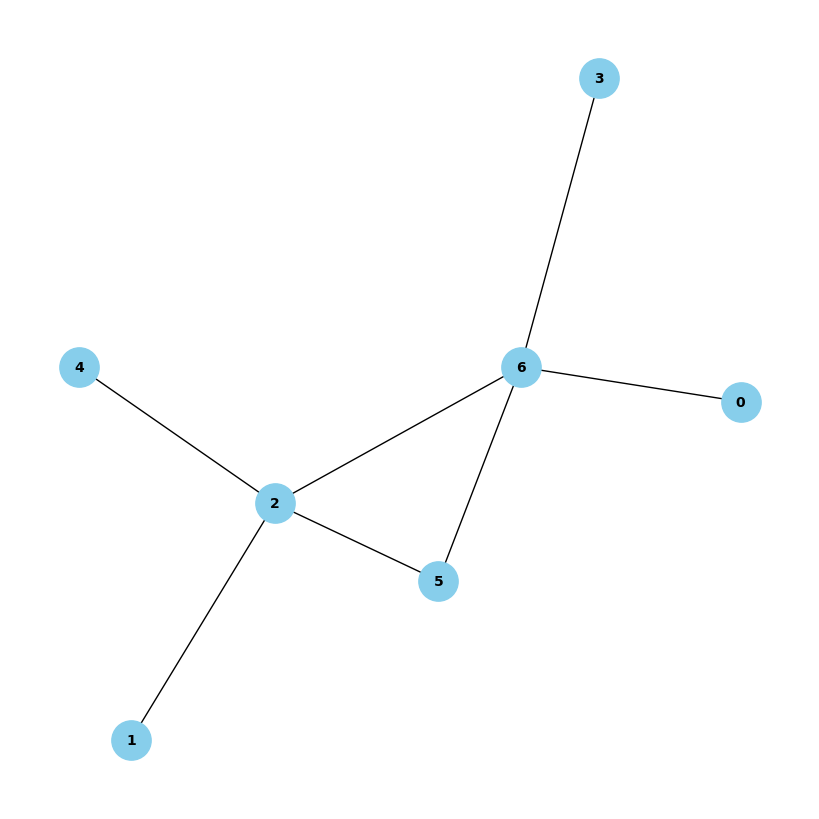

Premer zadnjega grafa: 3
Ni max ravnovesje, vozlišču 2 se splača izbrisati povezavo (2, 5)


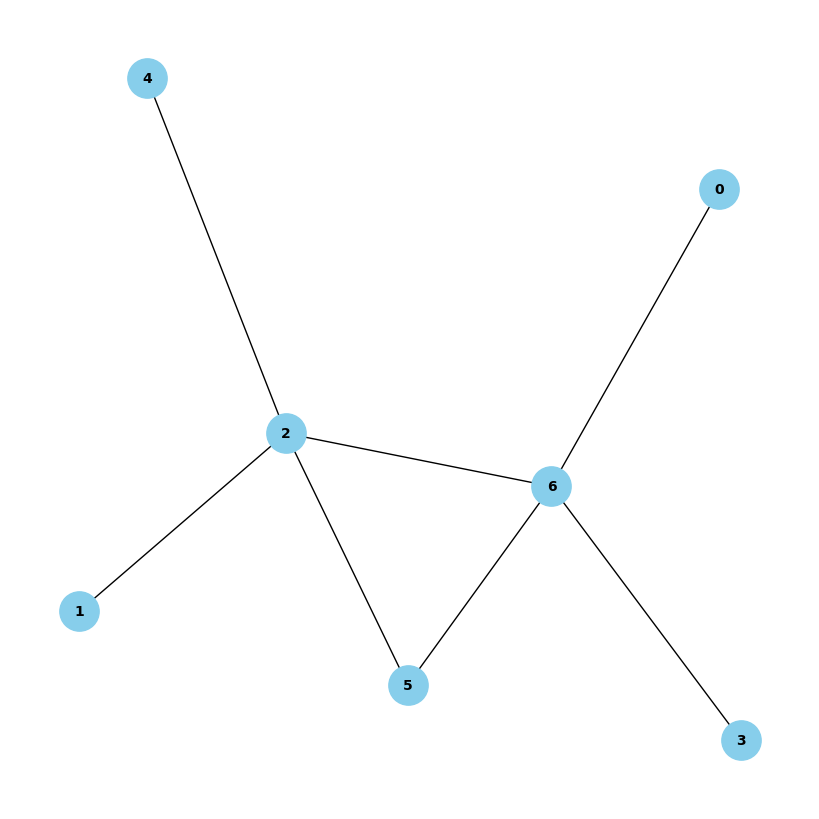

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G


def vsota_vseh_lokalnih_premerov(graf):
    vsota = 0
    for n in graf.nodes:
        vsota += nx.eccentricity(graf, n)
    return vsota

#!!!!
def iskanje_social(n, e, max_iteracij):
    trenutna_resitev = nakljucni_zacetni_graf(n, e)
    for iteracija in range(max_iteracij):
        vozlisce1 = random.choice(list(trenutna_resitev.nodes))
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        if nx.is_connected(nova_resitev):
            if vsota_vseh_lokalnih_premerov(trenutna_resitev) >= vsota_vseh_lokalnih_premerov(nova_resitev):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
        else:
            # Izbere nakljucno drugo vozlisce in ga poveze z prvim
            vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
            nova_resitev.add_edge(vozlisce1, vozlisce2) 
            # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
            if nx.is_connected(nova_resitev):
                if vsota_vseh_lokalnih_premerov(trenutna_resitev) > vsota_vseh_lokalnih_premerov(nova_resitev):
                    trenutna_resitev = nova_resitev.copy()
                    print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                    print(f"Iteracija: {iteracija}")
                    plt.figure(figsize=(8, 8))
                    nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                    plt.show()
    return trenutna_resitev


def potratno_ravnovesje_max(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača izbrisati povezavo {p}"
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'

st_vozlisc = 7
max_iteracij = 100
st_povezav = 8

zadnji_graf = iskanje_social(st_vozlisc, st_povezav, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")
print(potratno_ravnovesje_max(zadnji_graf))

plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

9
Ni max ravnovesje, vozlišču 1 se splača izbrisati povezavo (1, 2)


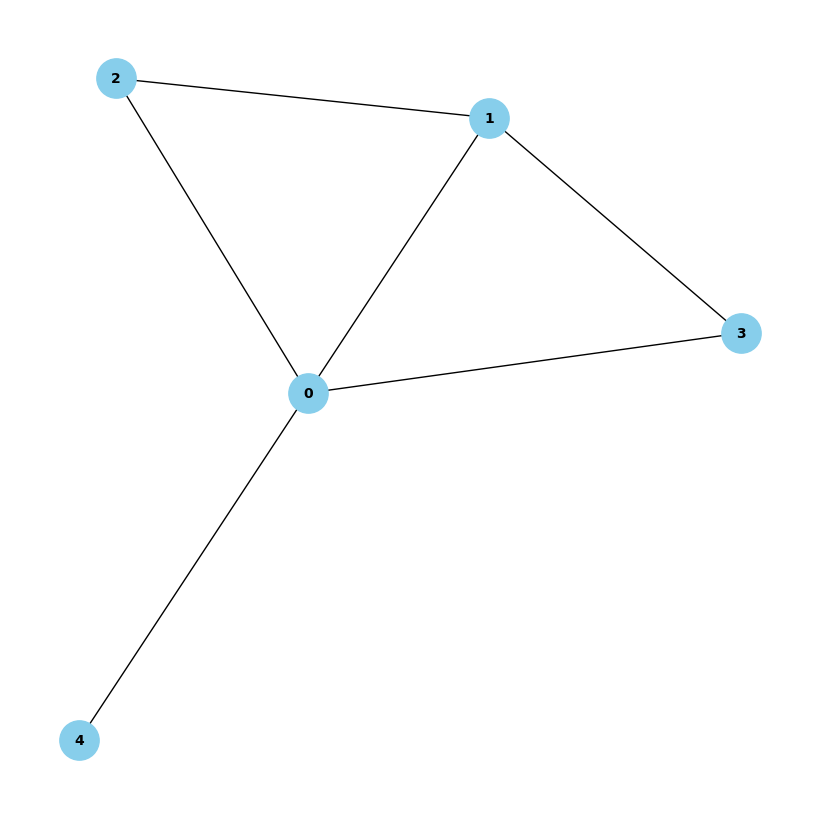

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it


def vsi_grafi(n, e):
    # Generate all possible edges combinations
    all_edges = list(it.combinations(range(n), 2))
    
    # Check if e is valid
    if e < n-1 or e > len(all_edges):
        raise ValueError("Invalid number of edges for a graph with {} nodes.".format(n))
    
    # Generate all graphs with n nodes and e edges
    graphs = []
    for edges in it.combinations(all_edges, e):
        G = nx.Graph()
        G.add_nodes_from(range(n))
        G.add_edges_from(edges)
        graphs.append(G)
    
    return graphs


def soc_opti_max(n, e):
    soc_opt = float('inf')
    vsi = vsi_grafi(n, e)

    for g in vsi:
        if nx.is_connected(g):
            st = vsota_vseh_lokalnih_premerov(g)
            if st < soc_opt:
                soc_opt = st
                graf = g
        
    return soc_opt, graf


n = 5
e = 6

def potratno_ravnovesje_max(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača izbrisati povezavo {p}"
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                        return f"Ni max ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'

print(soc_opti_max(n, e)[0])
print(potratno_ravnovesje_max(soc_opti_max(n, e)[1]))
plt.figure(figsize=(8, 8))
nx.draw(soc_opti_max(n, e)[1], with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

In [4]:
from tabulate import tabulate

def potratno_ravnovesje_max(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) >= nx.eccentricity(testni_graf, v1):
                        return f"Ni"
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if nx.eccentricity(graf, v1) > nx.eccentricity(testni_graf, v1):
                        return f"Ni"
    return 'Je'

n = 5
data = []

for i in range(2, n + 1):
    row = []
    row.append(i)
    for j in range(i - 1, int(i*(i-1)/2 + 1)):
        k = soc_opti_max(i, j)
        row.append((k[0], potratno_ravnovesje_max(k[1])))
    data.append(row)

headers = ["n\e"] + [f"n + { - 2 + i}" for i in range(1, int(n*(n-1)/2 + 1))]
headers = ["n\\e"] + [f"n + { - 2 + i}" for i in range(1, int(n*(n-1)/2 + 1))]



latex_table = tabulate(data, headers, tablefmt="latex")


print(latex_table)

\begin{tabular}{rlllllll}
\hline
   n\textbackslash{}e & n + -1    & n + 0     & n + 1     & n + 2     & n + 3     & n + 4     & n + 5     \\
\hline
     2 & (2, 'Je') &           &           &           &           &           &           \\
     3 & (5, 'Je') & (3, 'Je') &           &           &           &           &           \\
     4 & (7, 'Je') & (7, 'Ni') & (6, 'Ni') & (4, 'Je') &           &           &           \\
     5 & (9, 'Je') & (9, 'Ni') & (9, 'Ni') & (8, 'Ni') & (8, 'Ni') & (7, 'Ni') & (5, 'Je') \\
\hline
\end{tabular}


<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
C:\Users\peter\AppData\Local\Temp\ipykernel_2592\1285236023.py:29: SyntaxWarning: invalid escape sequence '\e'
  headers = ["n\e"] + [f"n + { - 2 + i}" for i in range(1, int(n*(n-1)/2 + 1))]


In [8]:
from tabulate import tabulate

n = 6
data = []

for i in range(2, n + 1):
    row = []
    row.append(i)
    for j in range(i - 1, int(i*(i-1)/2 + 1)):
        k = soc_opti_max(i, j)
        row.append(k[0])
    data.append(row)

headers = ["n\e"] + [f"n + { - 2 + i}" for i in range(1, int(n*(n-1)/2 + 1))]



latex_table = tabulate(data, headers, tablefmt="latex")


print(latex_table)

<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
C:\Users\peter\AppData\Local\Temp\ipykernel_2592\1056493471.py:14: SyntaxWarning: invalid escape sequence '\e'
  headers = ["n\e"] + [f"n + { - 2 + i}" for i in range(1, int(n*(n-1)/2 + 1))]


\begin{tabular}{rrrrrrrrrrrr}
\hline
   n\textbackslash{}e &   n + -1 &   n + 0 &   n + 1 &   n + 2 &   n + 3 &   n + 4 &   n + 5 &   n + 6 &   n + 7 &   n + 8 &   n + 9 \\
\hline
     2 &        2 &         &         &         &         &         &         &         &         &         &         \\
     3 &        5 &       3 &         &         &         &         &         &         &         &         &         \\
     4 &        7 &       7 &       6 &       4 &         &         &         &         &         &         &         \\
     5 &        9 &       9 &       9 &       8 &       8 &       7 &       5 &         &         &         &         \\
     6 &       11 &      11 &      11 &      11 &      10 &      10 &      10 &       9 &       9 &       8 &       6 \\
\hline
\end{tabular}


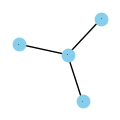

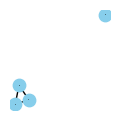

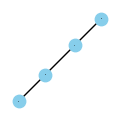

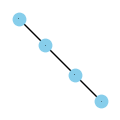

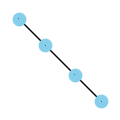

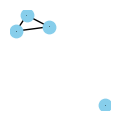

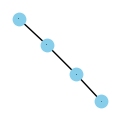

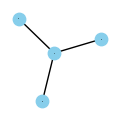

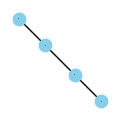

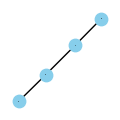

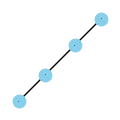

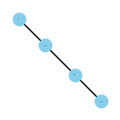

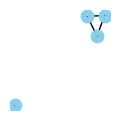

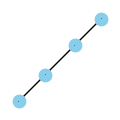

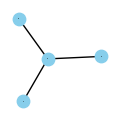

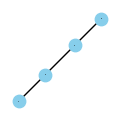

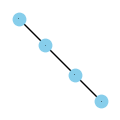

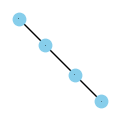

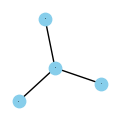

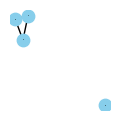

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it


def vsi_grafi(n, e):
    # Generate all possible edges combinations
    all_edges = list(it.combinations(range(n), 2))
    
    # Check if e is valid
    if e < n-1 or e > len(all_edges):
        raise ValueError("Invalid number of edges for a graph with {} nodes.".format(n))
    
    # Generate all graphs with n nodes and e edges
    graphs = []
    for edges in it.combinations(all_edges, e):
        G = nx.Graph()
        G.add_nodes_from(range(n))
        G.add_edges_from(edges)
        graphs.append(G)
    
    return graphs

for g in vsi_grafi(4,3):
    plt.figure(figsize=(1, 1))
    nx.draw(g, with_labels=True, font_weight='bold', node_color='skyblue', node_size=80, font_size=1)
    plt.show()

In [7]:
def generate_connected_graphs(n, e):
    # Generate all graphs with n nodes
    all_graphs = list(nx.graphs(n))

    # Filter out graphs with fewer or more edges than e
    valid_graphs = [G for G in all_graphs if G.number_of_edges() == e]

    # Filter out graphs that are not connected
    connected_graphs = [G for G in valid_graphs if nx.is_connected(G)]

    return connected_graphs